## BLM442 Keşif aktivitesi-5: Makine Öğrenmesi

#### İsim/Soyisim: Berkay Çapar
#### Öğrenci Numarası: 160201085
#### E-mail: berkaycapar@gmail.com
#### Kullanılan dataset adı: Audit Data
#### Dataset url: https://archive.ics.uci.edu/ml/datasets/Audit+Data

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-5 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as statm

#### Kısım 1 (Regresyon Analizi): Daha once kullanmıs oldugunuz (kesif aktivitesi 1 spreadsheet) veriseti üzerindeki kolonlar (Nümerik predictors ve nümerik cikti) arasındaki pozitif ve negatif korelasyonu bulunuz.  r veya R^2  değerlerini belirleyiniz.

In [2]:
# ----> Pearson's Product Moment Correlation (PPMC) <----
# Bu soruda Simple Linear Regression kullanacağım için -r- ile işlem yapacağım
# Multiple Linear Regression kullansaydım -R- 
# coefficient of determination (r squared) kullanılacak.

In [3]:
data = pd.read_csv('earthquake.csv')

In [4]:
dataset = pd.DataFrame(data)
dataset = dataset.dropna() #Not a Number olan değerlerin bulunduğu satırlar silindi.

In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
dataset.corr()
#şekilden de anlaşılabileceği ve normalde de deprem şiddetlerinin hesaplanmasında
#kullanılan md + mw + ms + mb = xm eşitliğinin
#karşılaştırıldıklarında birbirleri ile +1 yönünde pozitif yönlü iyi bir ilişki olduğunu anlayabiliriz
#bununla birlikte derinlik(depth) ile alakalı yakın bir ilişki yoktur.
#ayrıca depremin lat - long değerleri ile ilişkisi de pek bulunmamaktadır
# + yönde correlation pozitif ilişki (biri artarken diğeri de artar)
# - yönde correlation negatif ilişki (biri azalırken diğeri de azalır)
# 0 ise correlation yoktur anlamındadır.

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
id,1.000000,-0.127318,-0.025417,-0.053031,-0.402696,-0.665362,-0.882337,-0.434106,-0.615867,-0.906186,-0.899138
lat,-0.127318,1.000000,0.036039,0.010661,-0.109592,0.089785,0.106935,0.103412,0.065132,0.110289,0.109626
long,-0.025417,0.036039,1.000000,0.156561,0.056968,0.056653,-0.011094,0.055426,0.011393,-0.021238,-0.021347
dist,-0.053031,0.010661,0.156561,1.000000,0.015861,0.033393,0.026621,0.028350,-0.011385,0.015036,0.020926
depth,-0.402696,-0.109592,0.056968,0.015861,1.000000,0.275904,0.472714,0.150387,0.278724,0.480657,0.481124
xm,-0.665362,0.089785,0.056653,0.033393,0.275904,1.000000,0.661321,0.600298,0.830262,0.711284,0.674586
md,-0.882337,0.106935,-0.011094,0.026621,0.472714,0.661321,1.000000,0.334715,0.620761,0.949864,0.937988
richter,-0.434106,0.103412,0.055426,0.028350,0.150387,0.600298,0.334715,1.000000,0.486314,0.412588,0.384518
mw,-0.615867,0.065132,0.011393,-0.011385,0.278724,0.830262,0.620761,0.486314,1.000000,0.647789,0.625864
ms,-0.906186,0.110289,-0.021238,0.015036,0.480657,0.711284,0.949864,0.412588,0.647789,1.000000,0.973946


In [7]:
dataset.shape

(1726, 17)

In [8]:
dataset.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,1.726000e+03,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,1.975591e+13,38.942138,32.949757,3.052028,23.759212,4.694786,3.264368,4.411472,4.590498,3.254403,3.316107
std,3.093094e+11,1.247153,5.555632,4.184812,21.065066,0.666930,2.227951,0.887299,0.916074,2.232994,2.212173
min,1.910000e+13,35.990000,25.740000,0.100000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.960000e+13,38.000000,28.800000,1.300000,9.500000,4.300000,0.000000,4.100000,4.200000,0.000000,0.000000
50%,1.970000e+13,39.000000,30.140000,2.300000,15.000000,4.700000,4.450000,4.500000,4.700000,4.400000,4.500000
75%,2.010000e+13,39.740000,38.240000,3.600000,33.000000,5.100000,4.800000,4.900000,5.100000,4.800000,4.900000
max,2.020000e+13,42.600000,45.000000,81.600000,172.000000,7.900000,7.200000,7.200000,7.700000,7.900000,7.100000


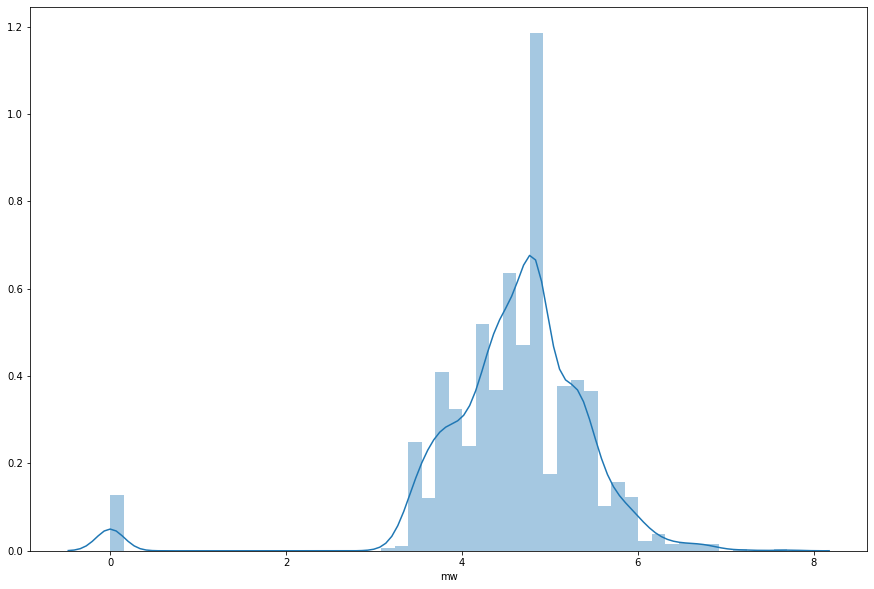

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['mw'])

In [10]:
#1 boyutlu sütun dizisi
X = dataset['xm'].values.reshape(-1,1)
y = dataset['mw'].values.reshape(-1,1)

In [11]:
#verilerin %80'i eğitime %20'si test verisi olarak ayarlandı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #algoritma eğitimi

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#soruda bizden istenen r²
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6873568213950957


In [14]:
"""
lineer regresyon modeli, kesişme ve eğim için en iyi değeri bulur, 
bununla da verilere en uygun çizgiyi çizerek sonuçlar.
"""
#kesim noktası:
print(regressor.intercept_)
#eğim katsayısı:
print(regressor.coef_)

[-0.771523]
[[1.14173778]]


In [15]:
#tahmin verilerinin oluşturulması
y_pred = regressor.predict(X_test)
print('oluşturulan veriler:', y_pred, sep='\n')

oluşturulan veriler:
[[5.73638232]
 [3.7954281 ]
 [4.13794944]
 [4.25212321]
 [4.25212321]
 [4.8229921 ]
 [4.93716588]
 [5.96472988]
 [3.33873299]
 [3.90960188]
 [3.90960188]
 [4.8229921 ]
 [4.02377566]
 [5.05133966]
 [3.56708055]
 [4.48047077]
 [4.8229921 ]
 [4.36629699]
 [3.7954281 ]
 [4.70881832]
 [4.02377566]
 [3.33873299]
 [6.64977254]
 [5.16551343]
 [4.8229921 ]
 [3.22455921]
 [4.13794944]
 [5.27968721]
 [3.22455921]
 [3.68125432]
 [5.27968721]
 [5.50803477]
 [5.62220854]
 [4.8229921 ]
 [4.70881832]
 [3.45290677]
 [4.8229921 ]
 [5.96472988]
 [3.68125432]
 [4.59464455]
 [5.96472988]
 [4.8229921 ]
 [4.13794944]
 [4.70881832]
 [3.33873299]
 [5.8505561 ]
 [4.36629699]
 [3.22455921]
 [4.70881832]
 [4.02377566]
 [6.76394632]
 [4.8229921 ]
 [5.39386099]
 [4.25212321]
 [5.50803477]
 [4.70881832]
 [4.59464455]
 [5.27968721]
 [4.25212321]
 [5.39386099]
 [4.70881832]
 [5.96472988]
 [4.70881832]
 [5.39386099]
 [4.70881832]
 [4.70881832]
 [3.90960188]
 [5.27968721]
 [3.90960188]
 [5.05133966]

In [16]:
df = pd.DataFrame({'Esas Olan': y_test.flatten(), 'Tahmin Verisi': y_pred.flatten()})
df

,Esas Olan,Tahmin Verisi
0,5.7,5.736382
1,4.0,3.795428
2,4.3,4.137949
3,4.4,4.252123
4,4.4,4.252123
...,...,...
341,5.2,5.165513
342,4.7,4.594645
343,5.3,5.279687
344,4.9,4.822992


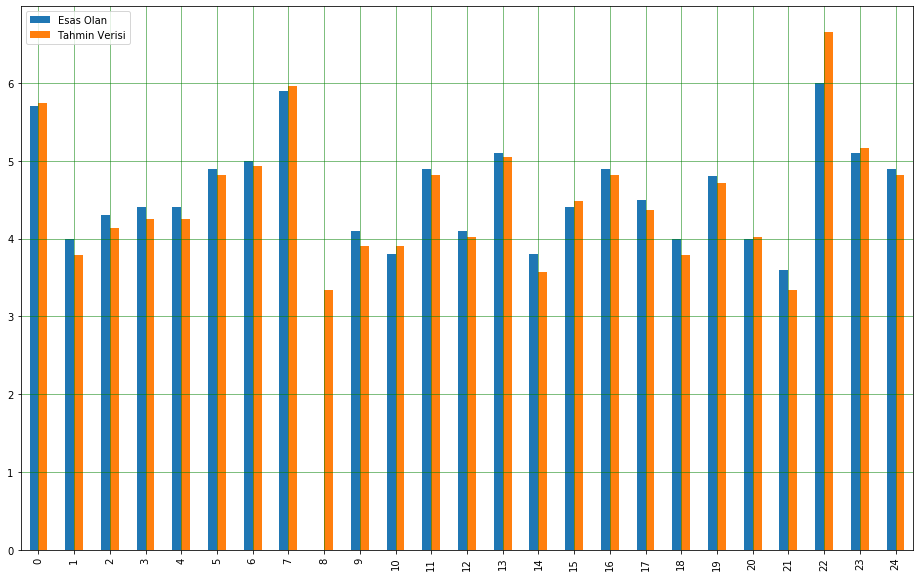

In [17]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

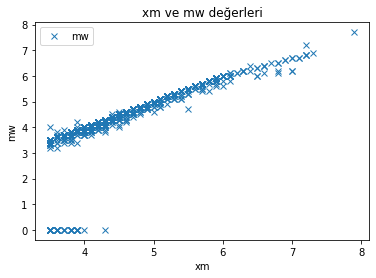

In [18]:
#önce değerlerimize bakalım, sonra da doğrumuzu çizdiririz
dataset.plot(x='xm', y='mw', style='x')  
plt.title('xm ve mw değerleri')  
plt.xlabel('xm')  
plt.ylabel('mw')  
plt.show()

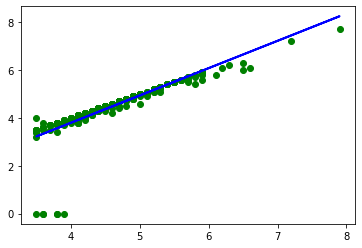

In [19]:
#linear regresyon olarak üzerinde çalışılan doğru çizdirilir.
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [20]:
print('Mean Absolute Error (Ortalama Mutlak Hata):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (Ortalama Kare Hatası):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error(Kök Ortalama Kare Hatası):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (Ortalama Mutlak Hata): 0.17572890558041962
Mean Squared Error (Ortalama Kare Hatası): 0.23009450060028291
Root Mean Squared Error(Kök Ortalama Kare Hatası): 0.4796816658996703


In [21]:
#SON OLARAK
#soruda bizden istenen r²
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq, "olarak bulunur")

coefficient of determination: 0.6873568213950957 olarak bulunur


#### Kısım 2 (Ekteki verisetlerinden biri üzerinde herhangi bir sınıflandırma algoritması gerçekleme) Sectiginiz verisetini Google Drive'da belirtiniz. Her kişi farklı veriseti seçmelidir. Veriseti üzerinde gerekiyorsa birtakım önişlemler yapılmalı, bir sınıflandırma modeli olusturularak modelin performansı çeşitli metriklerle sunulmalıdır.

https://docs.google.com/spreadsheets/d/19g8vDmC20FQGo2t-NQNb1MD6jwcJvfIJXwxl7vQCIlA/edit?usp=sharing

In [22]:
data2 = pd.read_csv('trial.csv')

In [23]:
clustering = pd.DataFrame(data2)

In [24]:
# 2 FARKLI GİRDİ KULLANARAK Hiyerarşik Olmayan Kümeleme analizi (k-means) kullanılacaktır.

In [25]:
girdi = clustering[["Money_Value", "Score"]]
girdi = girdi.fillna(value=0) #NaN olan ifadeler 0 ile değişti

In [26]:
#Karşılaştırılacak Çıktı Değerleri
cikti= clustering["Risk"]
cikti = pd.DataFrame(cikti)

In [27]:
z = pd.DataFrame(girdi)

Modelin Doğruluğu:  0.5786082474226805


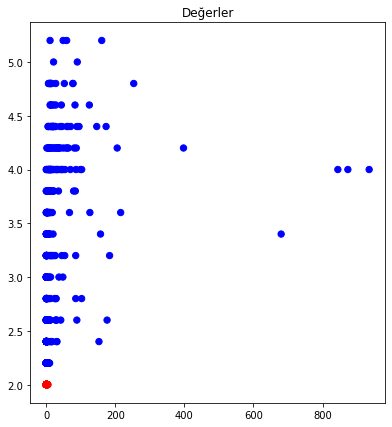

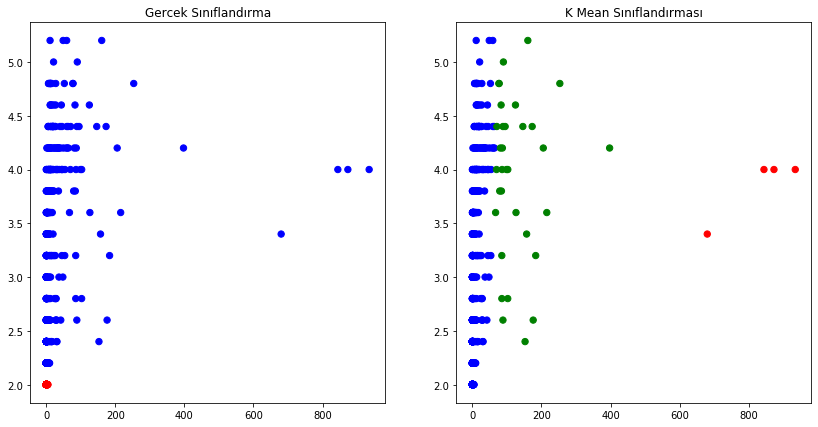

In [28]:
cikti.columns =['Risk']
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'blue', 'yellow'])
 
plt.subplot(1, 2, 1)
plt.scatter(z.Money_Value, z.Score, c=colormap[cikti.Risk], s=40)
plt.title('Değerler')

 
model = KMeans(n_clusters=3)
model.fit(z)
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'blue', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(z.Money_Value, z.Score, c=colormap[cikti.Risk], s=40)
plt.title('Gercek Sınıflandırma')

plt.subplot(1, 2, 2)
plt.scatter(z.Money_Value, z.Score, c=colormap[predY], s=40)
plt.title('K Mean Sınıflandırması')

#DOĞRULUK PAYI
print("Modelin Doğruluğu: ", sm.accuracy_score(cikti, predY))

#### Kısım 3 (Dünya kupası verini kumeleme) Herhangi bir kümeleme yontemi ile kumelenmeli ve modelin performansı sunulmalıdır.

https://www.kaggle.com/oliversinn/fifa-18-visualisation-clustering-ml/data

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
%matplotlib inline

In [30]:
df = pd.read_csv('CompleteDataset.csv',low_memory=False)

#### Öncelikle veri inceleme ve gerekli hazırlamaları yapalım

In [31]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [32]:
df.shape

(17981, 75)

In [33]:
df = df.drop("Unnamed: 0", axis=1)
df.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Photo                17981 non-null  object 
 3   Nationality          17981 non-null  object 
 4   Flag                 17981 non-null  object 
 5   Overall              17981 non-null  int64  
 6   Potential            17981 non-null  int64  
 7   Club                 17733 non-null  object 
 8   Club Logo            17981 non-null  object 
 9   Value                17981 non-null  object 
 10  Wage                 17981 non-null  object 
 11  Special              17981 non-null  int64  
 12  Acceleration         17981 non-null  object 
 13  Aggression           17981 non-null  object 
 14  Agility              17981 non-null  object 
 15  Balance              17981 non-null 

In [35]:
df['Free kick accuracy'].unique()

array(['76', '90', '84', '11', '19', '79', '62', '67', '83', '78', '77',
       '85', '72', '31', '13', '14', '75', '74', '61', '51', '53', '10',
       '82', '81', '49', '64', '87', '68', '43', '70', '66', '86', '59',
       '69', '45', '35', '39', '73', '47', '54', '71', '15', '8', '12',
       '26', '58', '91', '52', '63', '44', '28', '65', '57', '22', '27',
       '20', '30', '60', '56', '32', '50', '16', '42', '33', '89', '55',
       '37', '80', '48', '46', '38', '23', '36', '81+1', '18', '17', '25',
       '34', '40', '66-5', '24', '93', '73+1', '29', '88', '41', '21',
       '57+5', '60-4', '56+4', '7', '9', '60+8', '53+11', '63-7', '77-3',
       '4', '58+2', '69+1', '52+10', '62-3', '69-2', '65+1', '70+5',
       '39+2', '6', '58+6', '62-4', '65+5', '61+10', '71+4', '56+11',
       '64+1', '39+10', '55+21', '64+8', '70+3', '68+4', '70+17', '69+12',
       '65+24', '52+9', '70+21', '39-9', '66+30', '64-3', '70+4', '67-1',
       '39-6', '65+29', '56-2', '64-2', '36+4', '53+1',

In [36]:
fix_cols = ['Acceleration','Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
    'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
    'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
    'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
    'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
    'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
    'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
    'Volleys']

In [37]:
for col in fix_cols:
    
    df[col] = df[col].apply(lambda x : eval(str(x)))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Photo                17981 non-null  object 
 3   Nationality          17981 non-null  object 
 4   Flag                 17981 non-null  object 
 5   Overall              17981 non-null  int64  
 6   Potential            17981 non-null  int64  
 7   Club                 17733 non-null  object 
 8   Club Logo            17981 non-null  object 
 9   Value                17981 non-null  object 
 10  Wage                 17981 non-null  object 
 11  Special              17981 non-null  int64  
 12  Acceleration         17981 non-null  int64  
 13  Aggression           17981 non-null  int64  
 14  Agility              17981 non-null  int64  
 15  Balance              17981 non-null 

### Şimdi iki takım için kümeleme (K-Means) uygulanacak.

In [39]:
df['Club'].unique()

array(['Real Madrid CF', 'FC Barcelona', 'Paris Saint-Germain',
       'FC Bayern Munich', 'Manchester United', 'Chelsea', 'Juventus',
       'Manchester City', 'Arsenal', 'Atlético Madrid',
       'Borussia Dortmund', 'Milan', 'Tottenham Hotspur', 'Napoli',
       'Inter', 'Liverpool', 'Roma', 'Beşiktaş JK', 'AS Monaco',
       'Bayer 04 Leverkusen', 'AS Saint-Étienne',
       'Athletic Club de Bilbao', '1. FC Köln', 'Villarreal CF',
       'FC Schalke 04', 'Olympique de Marseille', 'Atalanta',
       'RB Leipzig', 'Real Sociedad', 'Torino', 'Sporting CP',
       'Leicester City', 'Southampton', 'FC Porto', 'UD Las Palmas',
       'Olympique Lyonnais', 'Lazio', 'Genoa', 'Everton',
       'RC Celta de Vigo', 'Valencia CF', nan, 'Sevilla FC', 'Toronto FC',
       'Borussia Mönchengladbach', 'SL Benfica', 'RCD Espanyol',
       'OGC Nice', 'Spartak Moscow', 'Swansea City', 'Sassuolo',
       'TSG 1899 Hoffenheim', 'Stoke City', 'Shakhtar Donetsk',
       'West Ham United', 'SV Werder Bre

In [40]:
dfnm = df[(df.Club =='Fenerbahçe SK')| (df.Club=='Galatasaray SK')]

In [41]:
dfnm = dfnm.drop_duplicates(subset=['Name'])

In [42]:
names = dfnm['Name'].tolist()

In [43]:
dfnm[:3]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
265,F. Muslera,31,https://cdn.sofifa.org/48/18/players/182494.png,Uruguay,https://cdn.sofifa.org/flags/60.png,82,82,Galatasaray SK,https://cdn.sofifa.org/24/18/teams/325.png,€13.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,Y. Belhanda,27,https://cdn.sofifa.org/48/18/players/193738.png,Morocco,https://cdn.sofifa.org/flags/129.png,81,81,Galatasaray SK,https://cdn.sofifa.org/24/18/teams/325.png,€18.5M,...,68.0,63.0,78.0,70.0,79.0,79.0,76.0,80.0,71.0,76.0
360,Giuliano,27,https://cdn.sofifa.org/48/18/players/184942.png,Brazil,https://cdn.sofifa.org/flags/54.png,81,82,Fenerbahçe SK,https://cdn.sofifa.org/24/18/teams/326.png,€20.5M,...,61.0,56.0,75.0,64.0,79.0,79.0,77.0,79.0,64.0,77.0


### Takım kalitesini eşitlemek için oyuncu türüne bakılır, 'club'e göre gruplanır ve normalleştirilir.

In [44]:
dfnm = dfnm.groupby('Club').transform(lambda x: (x - x.mean()) / x.std())

In [45]:
dfnm[:3]

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
265,0.887537,1.434855,1.256679,-1.555831,-0.407089,-2.074255,0.181330,-0.223662,-2.545171,-0.094104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,-0.007718,1.271033,1.046022,1.397658,0.606522,0.777560,1.370765,0.759094,1.020528,0.628283,...,0.519875,0.096484,1.90542,0.694053,1.484963,1.576765,1.314747,1.563398,0.834801,1.314747
360,0.064424,1.029430,1.638714,0.887585,1.179095,0.496121,1.127345,1.202663,0.835324,1.221158,...,-0.096955,-0.336388,0.93024,0.052664,1.144042,1.167852,1.156248,1.119789,0.061976,1.156248


In [46]:
dfnm = dfnm.fillna(dfnm.mean())

#### min-max scaler ile verileri 0-1 arasında düzenliyoruz

In [47]:
from sklearn import preprocessing

In [48]:
x = dfnm.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

#### x-norm veri çerçevesini PCA ile 65'ten 2''ye indiriyoruz

In [49]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

#### buradan çıkacak elbowlara göre kümeleme ile k-means çizdirilir. (elbow method)

In [50]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [51]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [52]:
clusters_df

,num_clusters,cluster_errors
0,1,145.716058
1,2,76.816836
2,3,42.783305
3,4,26.523491
4,5,18.748237
5,6,13.706647
6,7,11.095280
7,8,9.216909
8,9,7.583084
9,10,6.719717


Text(0, 0.5, 'Kare Hatalarının Toplamı')

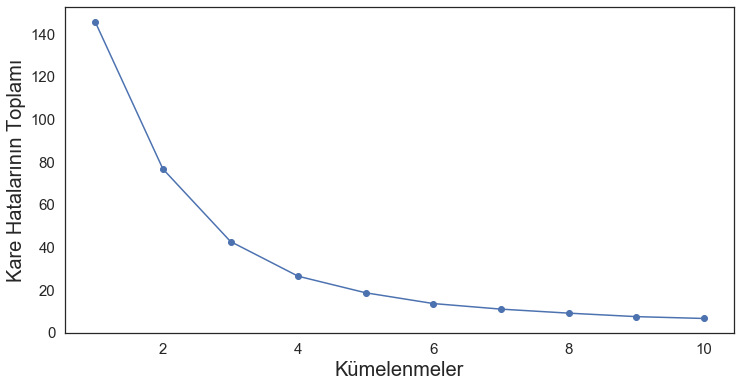

In [56]:
sns.set(style="white")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Kümelenmeler", fontsize=20)
plt.ylabel("Kare Hatalarının Toplamı", fontsize=20)

#### n'i 5 veriyoruz 

In [57]:
kmeans = KMeans(n_clusters=5)

kmeans = kmeans.fit(transformed)

labels = kmeans.predict(transformed)

C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

#### hesaplanan kümelemeleri ve oyuncu isimlerini dönüştürülen PCA veri çerçevesine geri ekliyoruz:

In [58]:
transformed['kumeleme'] = clusters

In [59]:
transformed['isim'] = names

In [60]:
transformed.columns = ['x','y','kumeleme','isim']

In [61]:
transformed[:3]

,x,y,kumeleme,isim
0,2.248936,-0.712062,4,F. Muslera
1,-1.818020,-0.436981,1,Y. Belhanda
2,-1.392157,-0.686499,1,Giuliano


#### Şimdi, sonuçlar çizdirilecek - x ve y eksenleri için PCA değerleri, kümeye göre renklendirme ve oyuncu adı etiketlerini ekleme:

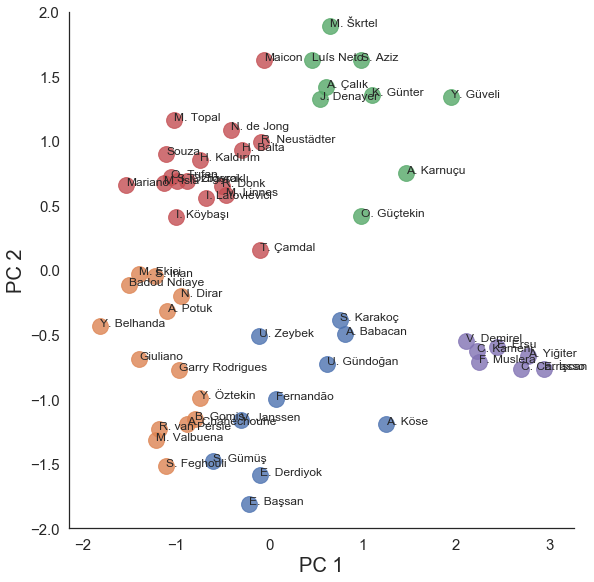

In [63]:
sns.set(style="white")


ax = sns.lmplot(x="x", y="y",hue='kumeleme', data=transformed, legend=False,
                   fit_reg=False, height =8, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.isim):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()

# ax.savefig("newc_man_kmeans.jpg")

### Teşekkürler.